Question: Is one Genre more associated with higher User Ratings than others?

This is an observational study, as I am analyzing data from the top 50 books on Amazon’s Best Sellers list without manipulating any variables. Most of the data were collected directly from Amazon’s Best Sellers lists, and any missing information was obtained using the GoodReads API. Since this dataset represents a sample rather than the entire population of books, the findings are based on this subset. The lists were scraped in October 2020, and because this dataset captures historical data from multiple years, it can also be considered a retrospective study.

One potential bias in this dataset is that it only includes books listed on Amazon, which excludes books from other bookstores or libraries. As a result, certain books or genres that are critically acclaimed but less popular on Amazon may be underrepresented.

In [18]:
import pandas as pd

# Read the CSV file (replace 'your_file.csv' with your actual filename)
df = pd.read_csv("Unit 1 Final/books.csv")

# Display the first 5 rows
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Na

/tmp/ipykernel_159/2898457357.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_stats = df.groupby('Genre')['User Rating'].describe()
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_159/2898457357.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.group

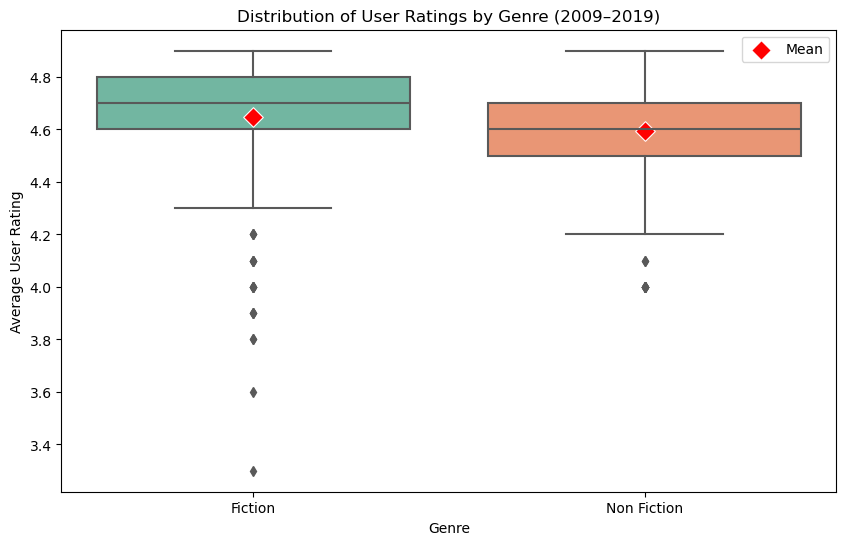

ANOVA Results:
F-statistic: 7.511401790853317
p-value: 0.006330997555282606
✅ Significant differences between genres!


In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
df = pd.read_csv("Unit 1 Final/books.csv")

# Inspect the dataset
print(df.head())
print(df.info())

# --- Step 1: Clean up genres (make sure it's categorical) ---
df['Genre'] = df['Genre'].astype('category')

# --- Step 2: Descriptive statistics ---
genre_stats = df.groupby('Genre')['User Rating'].describe()
print(genre_stats)

# --- Step 3: Visualization with means ---
plt.figure(figsize=(10,6))

# Boxplot
sns.boxplot(x="Genre", y="User Rating", data=df, palette="Set2")

# Overlay mean points
means = df.groupby('Genre')['User Rating'].mean().reset_index()
sns.scatterplot(x="Genre", y="User Rating", data=means, color='red', s=100, marker="D", label="Mean")

plt.title("Distribution of User Ratings by Genre (2009–2019)")
plt.ylabel("Average User Rating")
plt.legend()
plt.show()

# --- Step 4: Statistical Test ---
genres = df['Genre'].unique()
groups = [df.loc[df['Genre']==g, 'User Rating'] for g in genres]

f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Significant differences between genres!")
else:
    print("❌ No significant difference between genres.")


Analysis: The results indicate a statistically significant difference in user ratings across genres (p-value < 0.05). On average, fictional books tend to receive higher user ratings than non-fiction books. This suggests that genre is associated with differences in user ratings, supporting the conclusion that some genres are generally rated higher than others.